In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline  

import matplotlib as mpl    
import matplotlib.font_manager as fm

In [2]:
plt.rcParams['font.family']='NanumGothic'
print(plt.rcParams['font.family'])

['NanumGothic']


# 1번
### 1-1
- 주어진 heart.csv 파일을 불러오시오.
- 직전 데이터로 결측치 채우기, 'Unnamed: 0' 열 제거
- Sex 변수에서 0:'male', 1:'female' 로 변경
- 'Chol' 값이 평균 이상인 데이터 추출 <br>

### 1-2
- catplot을 이용하여 다음과 같이 그래프를 그리시오.(x축 라벨 폰트사이즈:10)

In [36]:
heart = pd.read_csv("./heart.csv")
heart.fillna(method="ffill", inplace=True)
heart["Sex"]=heart["Sex"].apply(lambda x: "male" if not x else "female")
chol_mean = heart["Chol"].mean()
up_heart = heart.loc[heart["Chol"]>=chol_mean,:]

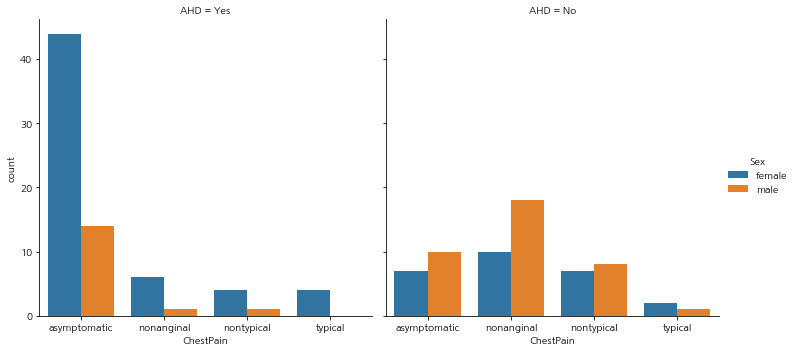

In [39]:
sns.catplot(x="ChestPain", col = "AHD", kind="count", hue="Sex",data=up_heart)

# 2번
### 2-1
- tips 데이터에서 성별에 따른 팁의 합계 데이터를 합친 데이터프레임을 만드시오.<br>

### 2-2
- 위의 데이터프레임을 이용하여 성별과 타입별 팁의 합을 가로 누적 막대그래프로 나타내시오.(hint: stacked)
- title: "성별&타입별 팁", 크기:18
- x축 title: "팁의 합" , 크기: 13,
- 범주 위치: best

In [40]:
tips = sns.load_dataset("tips")

In [66]:
tips_by = tips.pivot_table(index="time",columns="sex",values="tip",aggfunc="sum")

In [69]:
tips_by

sex,Male,Female
time,,
Lunch,95.11,90.40
Dinner,389.96,156.11


Text(0.5, 1.0, '성별&타입별 팁')

Text(0.5, 0, '팁의 합')

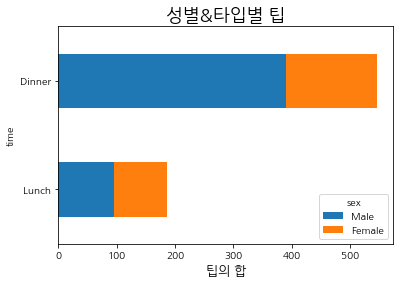

In [78]:
tips_by.plot(kind="barh", stacked=True)
plt.title("성별&타입별 팁", size = 18)
plt.xlabel("팁의 합", size = 13)

# 3번
### 3-1
- 일요일 , 토요일 , 목요일 , 금요일별로 total_bill의 분포를 subplot 을 통해 시각화 하시오 .
- 각 subplot은 모두 boxplot 이용
- 각 title : 해당 요일 , 크기 : 15
- 각 x축 title : '팁의 합 ', 크기 : 13
- figsize : (20,15)


<Figure size 1440x1080 with 0 Axes>

Text(0.5, 1.0, 'Sun')

Text(0.5, 0, '팁의 합')

Text(0.5, 1.0, 'Sat')

Text(0.5, 0, '팁의 합')

Text(0.5, 1.0, 'Thur')

Text(0.5, 0, '팁의 합')

Text(0.5, 1.0, 'Fri')

Text(0.5, 0, '팁의 합')

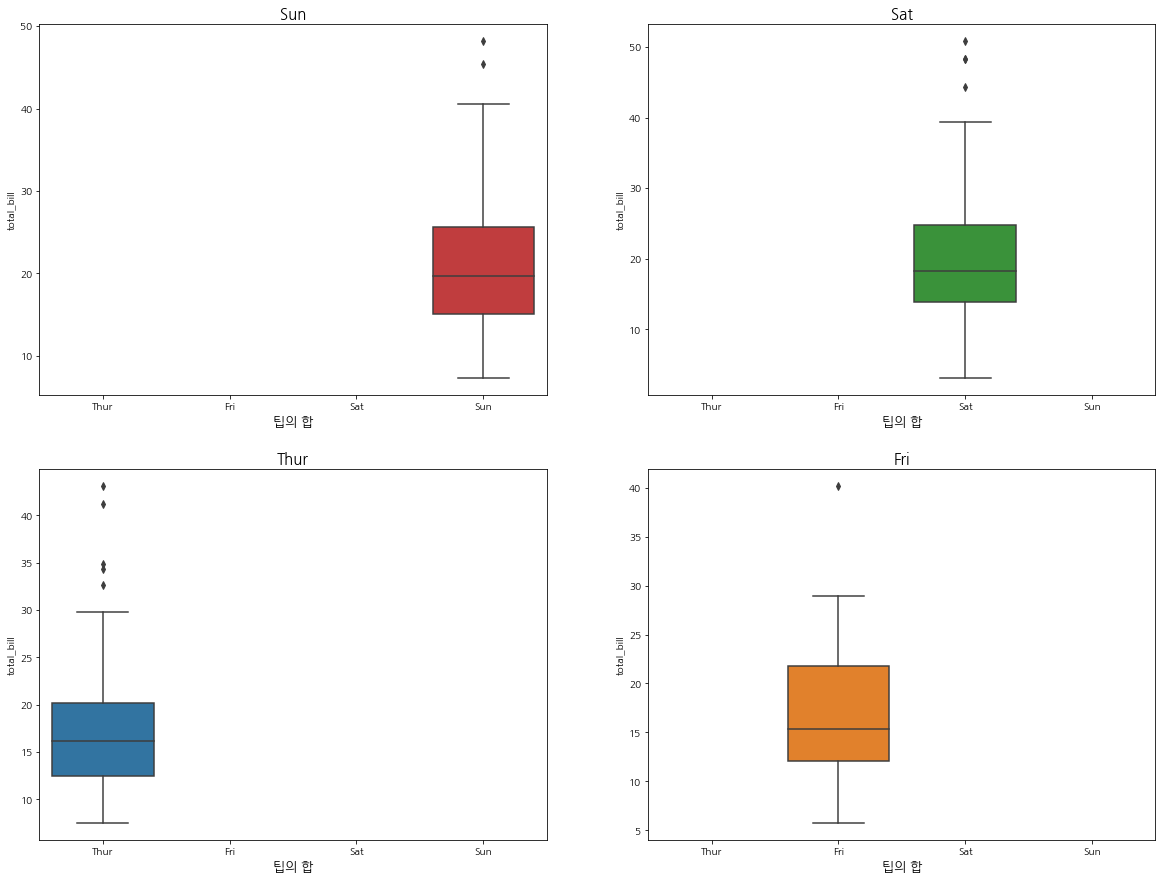

In [79]:
plt.figure(figsize = (20,15))
for idx, day in enumerate(tips["day"].unique()):
    plt.subplot(2,2,idx+1)
    sns.boxplot(x="day",y="total_bill",data = tips.loc[tips["day"]==day,:])
    plt.title(day, size = 15)
    plt.xlabel("팁의 합", size=13)

# 4번 ( 자료 p49 ~)
### 4-1 
- 공공데이터 포털에서 주소를 포함한 데이터를 수집하시오. ( csv or excel 형식 데이터로 수집 권장 )
- 단 , 공공데이터 포털에서 찾지 못할 경우 직접 데이터 프레임형식으로 주소 데이터를 생성하시오. ( 10행 이상 ) 

### 4-2 
- 주어진 데이터를 구글 위경도 변환을 통해 새로운 위,경도 열을 생성하시오.
- 위 , 경도 열 생성 후 dataframe 형식으로 불러오시오.

### 4-3 
- folium 라이브러리를 사용하여 주어진 주소에 해당하는 위치에 마커를 표시하시오.
- color : blue
- tooltip : 클릭~


In [93]:
# 2019년 서귀포시 복지시설 위치 -> 위경도변환
data = pd.read_csv("./geocoding_change.txt", sep="|")

In [94]:
data.head()

,result,address,x_coord,y_coord
0,success,제주특별자치도 서귀포시 대정읍 대한로88번길 78,126.252537440279,33.2303689183095
1,success,제주특별자치도 서귀포시남원읍 태위로115번길 15,126.659684662585,33.2765460832334
2,success,제주특별자치도 서귀포시성산읍 일주동로 4254,126.912014146814,33.4488052058657
3,success,제주특별자치도 서귀포시 안덕면 한창로 619,126.338866727761,33.3118867751635
4,success,제주특별자치도 서귀포시 토평로 172(토평동),126.588771692246,33.281561625672


In [114]:
data.drop(8, axis=0, inplace=True) # 이상한 값 제거

In [95]:
import folium

In [103]:
data.columns

Index(['result', 'address', 'x_coord', 'y_coord '], dtype='object')

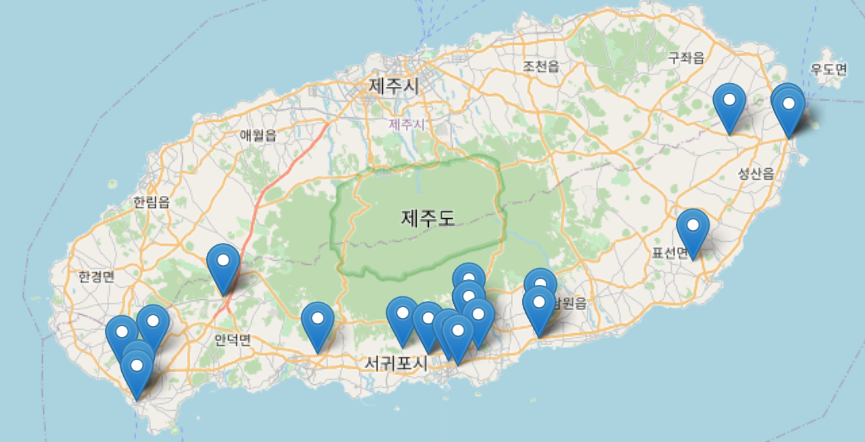

In [117]:
jeju = folium.Map(location = [33.17,126.29], zoom_start=12)
for y,x in zip(data["y_coord "], data["x_coord"]):
    folium.Marker([float(y),float(x)], color="blue", tooltip="클릭~").add_to(jeju)
jeju.save("./jeju.html")